In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
df1 = pd.read_excel('nova_placa.xlsx')
df2 = pd.read_excel('nova_placa_ambiente.xlsx')

In [67]:
df1['Data'] = pd.to_datetime(df1['Data'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
df1['Hora'] = pd.to_datetime(df1['Hora'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df2['Data'] = pd.to_datetime(df2['Data'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
df2['Hora'] = pd.to_datetime(df2['Hora'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

# Média para a df1


In [5]:
# Agrupar os dados por data e calcular a média das colunas de temperatura e umidade
daily_means = df1.groupby('Data').mean(numeric_only=True)

In [6]:
daily_means.reset_index(inplace=True)
daily_means

,Data,TC15,UC15,TC6,UC6,TC27,UC27
0,2024-04-19,25.910599,99.900000,28.127189,83.820737,28.180645,95.214747
1,2024-04-20,24.026271,99.900000,26.150282,82.472175,25.933051,95.320339
2,2024-04-21,23.996585,99.900000,26.049387,81.795709,25.993958,93.354729
3,2024-04-22,24.703348,99.900000,26.802475,79.954876,26.423144,91.748763
4,2024-04-23,24.999298,99.900000,27.097753,76.450702,26.747612,88.839185
...,...,...,...,...,...,...,...
151,2024-10-10,23.392683,60.814905,25.237127,96.420596,24.432520,82.941463
152,2024-10-11,22.874233,65.417178,23.506135,99.049693,22.499387,85.509816
153,2024-10-12,27.399568,68.199784,27.982289,99.293089,28.602160,84.891361
154,2024-10-13,27.146250,68.740000,27.713472,99.270278,27.564167,85.176111


Text(0, 0.5, 'Umidade (%)')

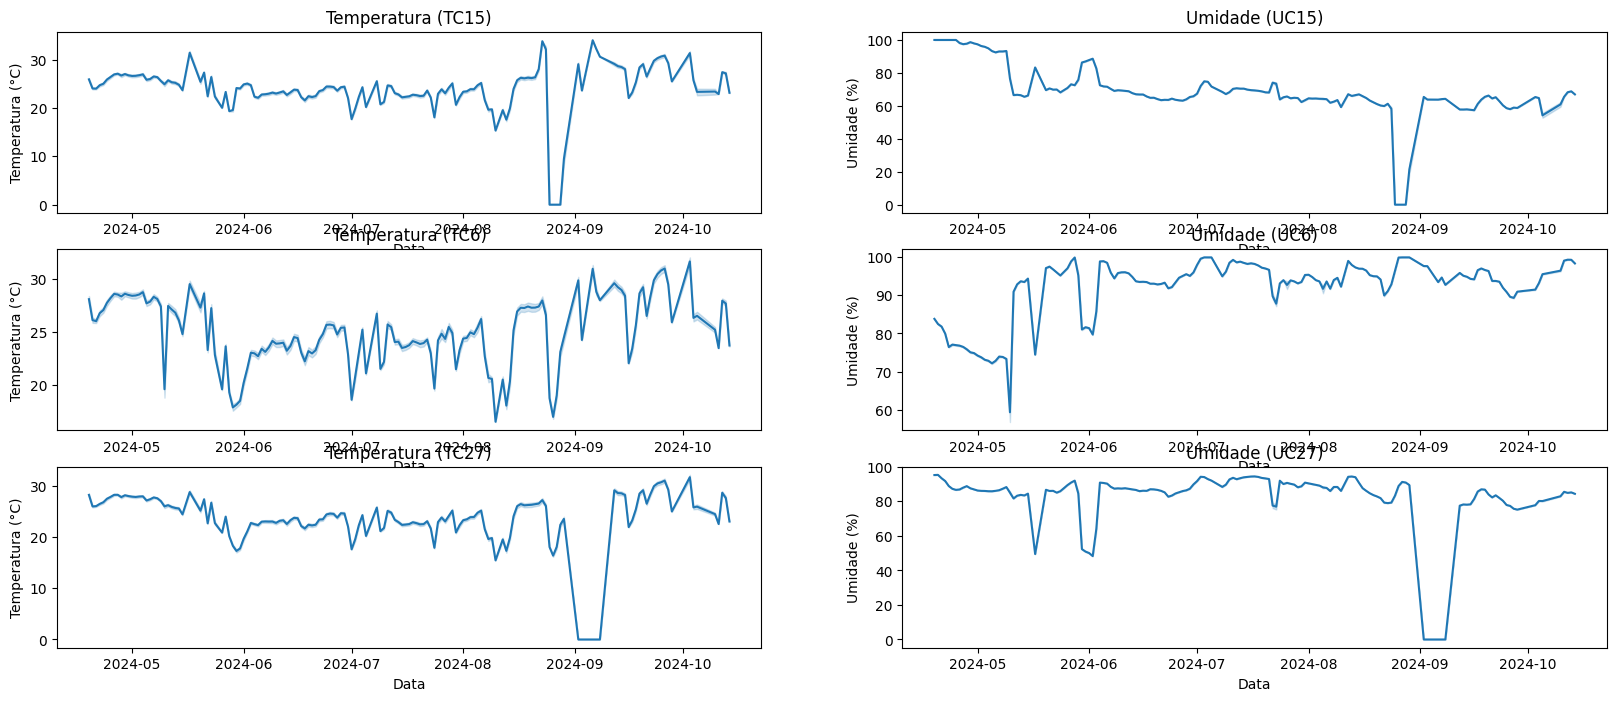

In [21]:
plt.figure(figsize=(20, 8))

# Temperatura (TC15) por data
plt.subplot(3, 2, 1)
sns.lineplot(x='Data', y='TC15', data=df1)
#plt.xticks(rotation=90)
plt.title("Temperatura (TC15)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

plt.subplot(3, 2, 2)
sns.lineplot(x='Data', y='UC15', data=df1)
#plt.xticks(rotation=90)
plt.title("Umidade (UC15)")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Temperatura (TC6) por data
plt.subplot(3, 2, 3)
sns.lineplot(x='Data', y='TC6', data=df1)
#plt.xticks(rotation=90)
plt.title("Temperatura (TC6)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

plt.subplot(3, 2, 4)
sns.lineplot(x='Data', y='UC6', data=df1)
#plt.xticks(rotation=90)
plt.title("Umidade (UC6)")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Temperatura (TC27) por data
plt.subplot(3, 2, 5)
sns.lineplot(x='Data', y='TC27', data=df1)
#plt.xticks(rotation=90)
plt.title("Temperatura (TC27)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

plt.subplot(3, 2, 6)
sns.lineplot(x='Data', y='UC27', data=df1)
#plt.xticks(rotation=90)
plt.title("Umidade (UC27)")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")


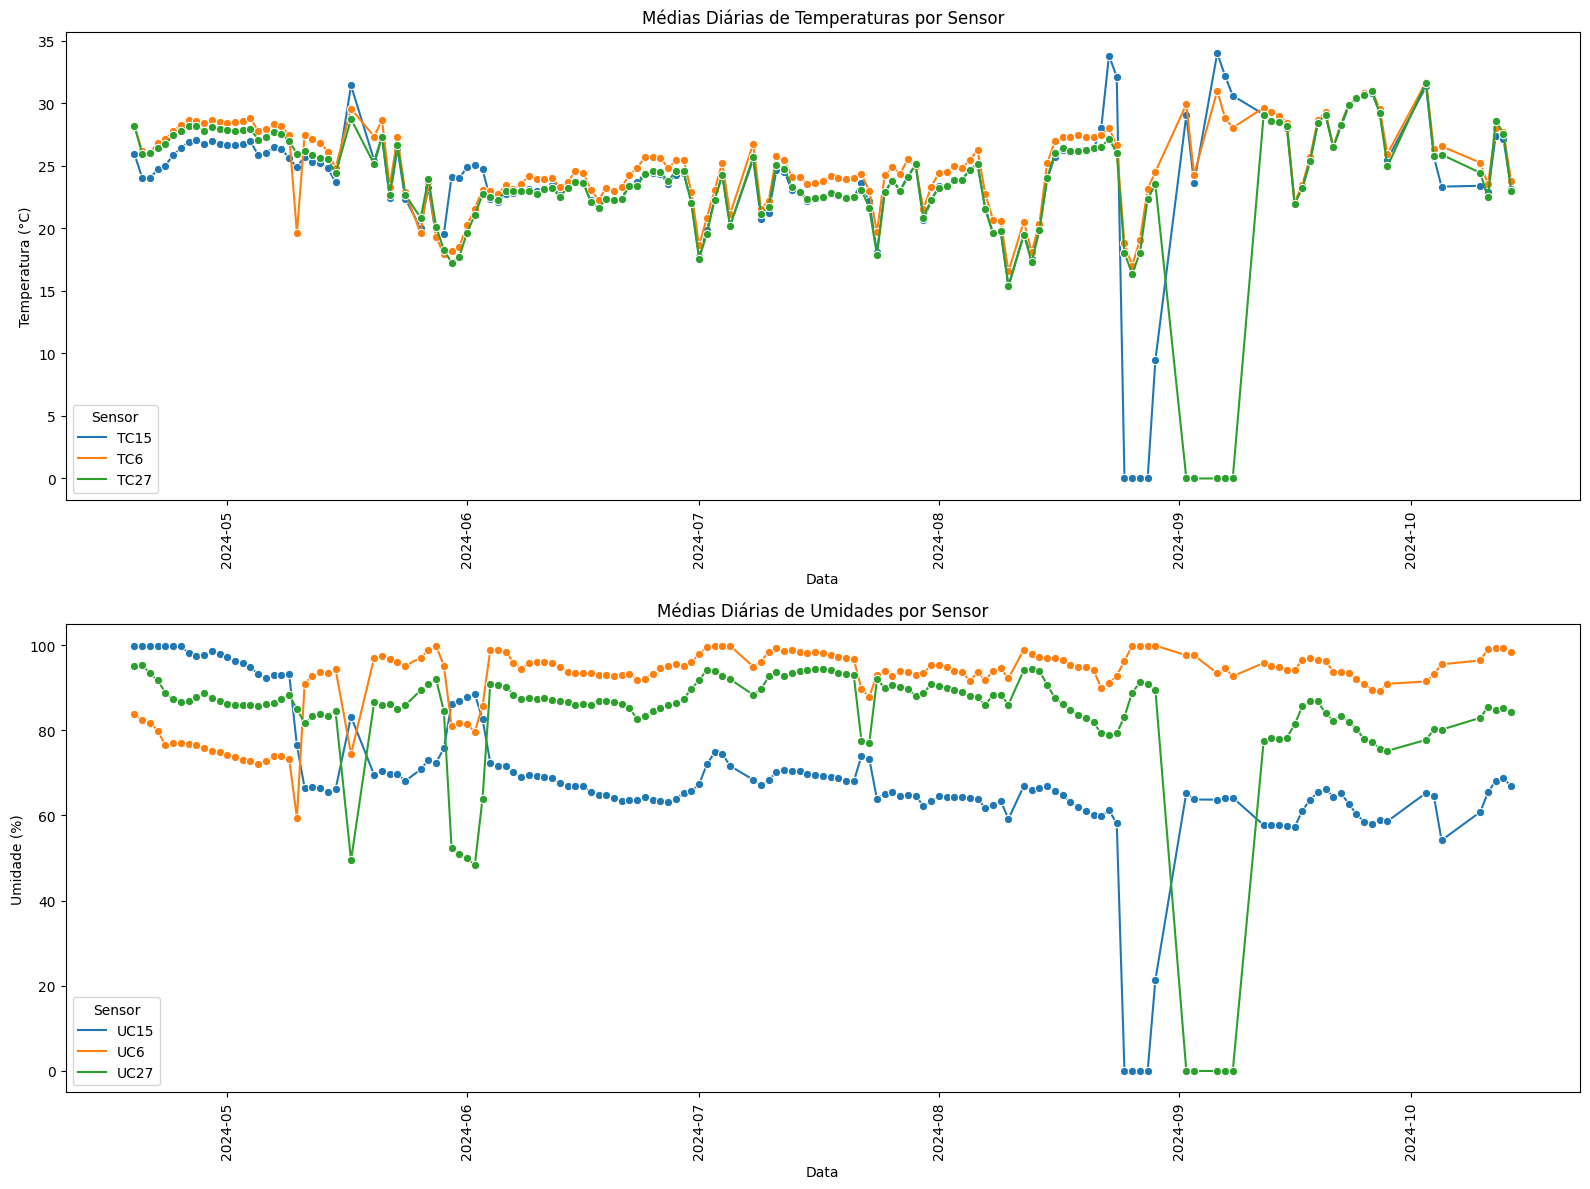

In [ ]:
# Transformar as médias diárias para o formato longo
temp_means_long = daily_means.melt(id_vars=['Data'], 
                                   value_vars=['TC15', 'TC6', 'TC27'], 
                                   var_name='Sensor', value_name='Temperatura')
umid_means_long = daily_means.melt(id_vars=['Data'], 
                                   value_vars=['UC15', 'UC6', 'UC27'], 
                                   var_name='Sensor', value_name='Umidade')

# Configurar o tamanho do gráfico
plt.figure(figsize=(16, 12))


sns.lineplot(x='Data', y='Temperatura', hue='Sensor', data=temp_means_long, marker="o")
plt.xticks(rotation=90)
plt.title("Médias Diárias de Temperaturas por Sensor")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

# Gráfico de umidades (médias diárias)
plt.subplot(2, 1, 2)
sns.lineplot(x='Data', y='Umidade', hue='Sensor', data=umid_means_long, marker="o")
plt.xticks(rotation=90)
plt.title("Médias Diárias de Umidades por Sensor")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Ajustar layout
plt.tight_layout()
plt.show()



# Média para df2

In [38]:
# Agrupar os dados por data e calcular a média das colunas de temperatura e umidade
daily_means = df2.groupby('Data').mean(numeric_only=True)

In [39]:
daily_means.reset_index(inplace=True)
daily_means

,Data,TC4,UC4,TC31,UC31,Tvazia,Uvazia
0,1900-08-07,24.400000,88.000000,23.800000,68.600000,23.500000,33.900000
1,1904-08-07,24.400000,88.000000,23.800000,68.600000,23.600000,34.000000
2,1908-08-07,24.400000,88.100000,23.900000,68.700000,23.600000,34.000000
3,1912-08-07,24.500000,88.000000,23.900000,68.700000,23.600000,34.000000
4,1916-08-07,24.500000,88.100000,23.900000,68.700000,23.600000,34.000000
...,...,...,...,...,...,...,...
172,2024-10-02,31.021469,81.593503,30.483475,63.928814,30.126412,27.792373
173,2024-10-03,26.988352,79.888636,26.269886,61.432955,26.207670,27.642330
174,2024-10-10,25.830807,86.123227,24.480685,65.576528,24.309535,34.422738
175,2024-10-11,28.049457,88.274457,26.957337,68.567663,26.630435,39.230978


Text(0, 0.5, 'Umidade (%)')

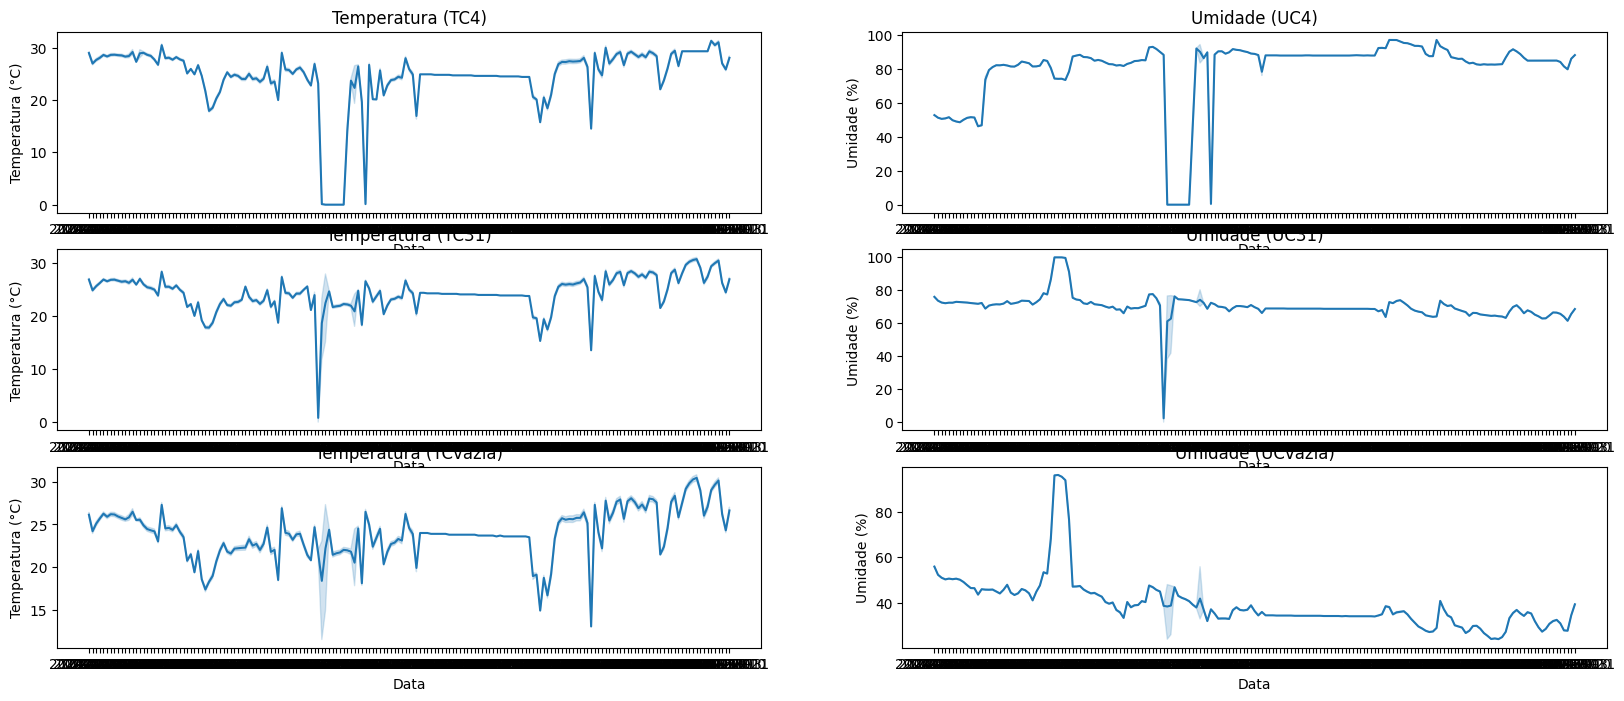

In [41]:
plt.figure(figsize=(20, 8))

# Temperatura (TC4) por data
plt.subplot(3, 2, 1)
sns.lineplot(x='Data', y='TC4', data=df2)
#plt.xticks(rotation=90)
plt.title("Temperatura (TC4)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

plt.subplot(3, 2, 2)
sns.lineplot(x='Data', y='UC4', data=df2)
#plt.xticks(rotation=90)
plt.title("Umidade (UC4)")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Temperatura (T31) por data
plt.subplot(3, 2, 3)
sns.lineplot(x='Data', y='TC31', data=df2)
#plt.xticks(rotation=90)
plt.title("Temperatura (TC31)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

plt.subplot(3, 2, 4)
sns.lineplot(x='Data', y='UC31', data=df2)
#plt.xticks(rotation=90)
plt.title("Umidade (UC31)")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Temperatura (TCvazia) por data
plt.subplot(3, 2, 5)
sns.lineplot(x='Data', y='Tvazia', data=df2)
#plt.xticks(rotation=90)
plt.title("Temperatura (TCvazia)")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

plt.subplot(3, 2, 6)
sns.lineplot(x='Data', y='Uvazia', data=df2)
#plt.xticks(rotation=90)
plt.title("Umidade (UCvazia)")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Tentando juntar as duas em uma só 

In [68]:
# Realizar o merge mantendo todas as combinações (outer join) de Data e Hora
merged_df = pd.merge(df1, df2, on=['Data', 'Hora'], how='outer')

# Garantir que a coluna 'Data' seja no formato datetime
merged_df['Data'] = pd.to_datetime(merged_df['Data'])

# Criar a coluna 'DataHora' para ordenação
merged_df['DataHora'] = pd.to_datetime(merged_df['Data'].astype(str) + ' ' + merged_df['Hora'].astype(str))

# Ordenar pelo campo combinado de DataHora
merged_df = merged_df.sort_values(by='DataHora')

# Remover a coluna auxiliar 'DataHora' após a ordenação
merged_df = merged_df.drop(columns=['DataHora'])

# Exportar o resultado para um novo arquivo Excel
merged_df.to_excel('uniao_tabelas_diferentes_linhas.xlsx', index=False)

In [74]:
juntos = pd.read_excel('uniao_tabelas_diferentes_linhas.xlsx')
# Agrupar os dados por data e calcular a média das colunas de temperatura e umidade
daily_means = juntos.groupby('Data').mean(numeric_only=True)

In [75]:
daily_means 

,TC15,UC15,TC6,UC6,TC27,UC27,TC4,UC4,TC31,UC31,Tvazia,Uvazia
Data,,,,,,,,,,,,
2024-04-19,25.910599,99.900000,28.127189,83.820737,28.180645,95.214747,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-20,24.026271,99.900000,26.150282,82.472175,25.933051,95.320339,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-21,23.996585,99.900000,26.049387,81.795709,25.993958,93.354729,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-22,24.703348,99.900000,26.802475,79.954876,26.423144,91.748763,28.969281,52.849346,26.903595,75.963725,26.133987,55.801961
2024-04-23,24.999298,99.900000,27.097753,76.450702,26.747612,88.839185,26.955322,51.316947,24.872969,73.612045,24.208683,52.194818
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-10,24.078153,61.299099,25.707883,96.165766,24.973649,82.578378,26.124000,85.964000,24.804421,65.579789,24.664842,34.408211
2024-10-11,22.874233,65.417178,23.506135,99.049693,22.499387,85.509816,28.049457,88.274457,26.957337,68.567663,26.630435,39.230978
2024-10-12,27.399568,68.199784,27.982289,99.293089,28.602160,84.891361,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
daily_means.to_excel('medias_diarias.xlsx')

In [76]:
daily_means.reset_index(inplace=True)

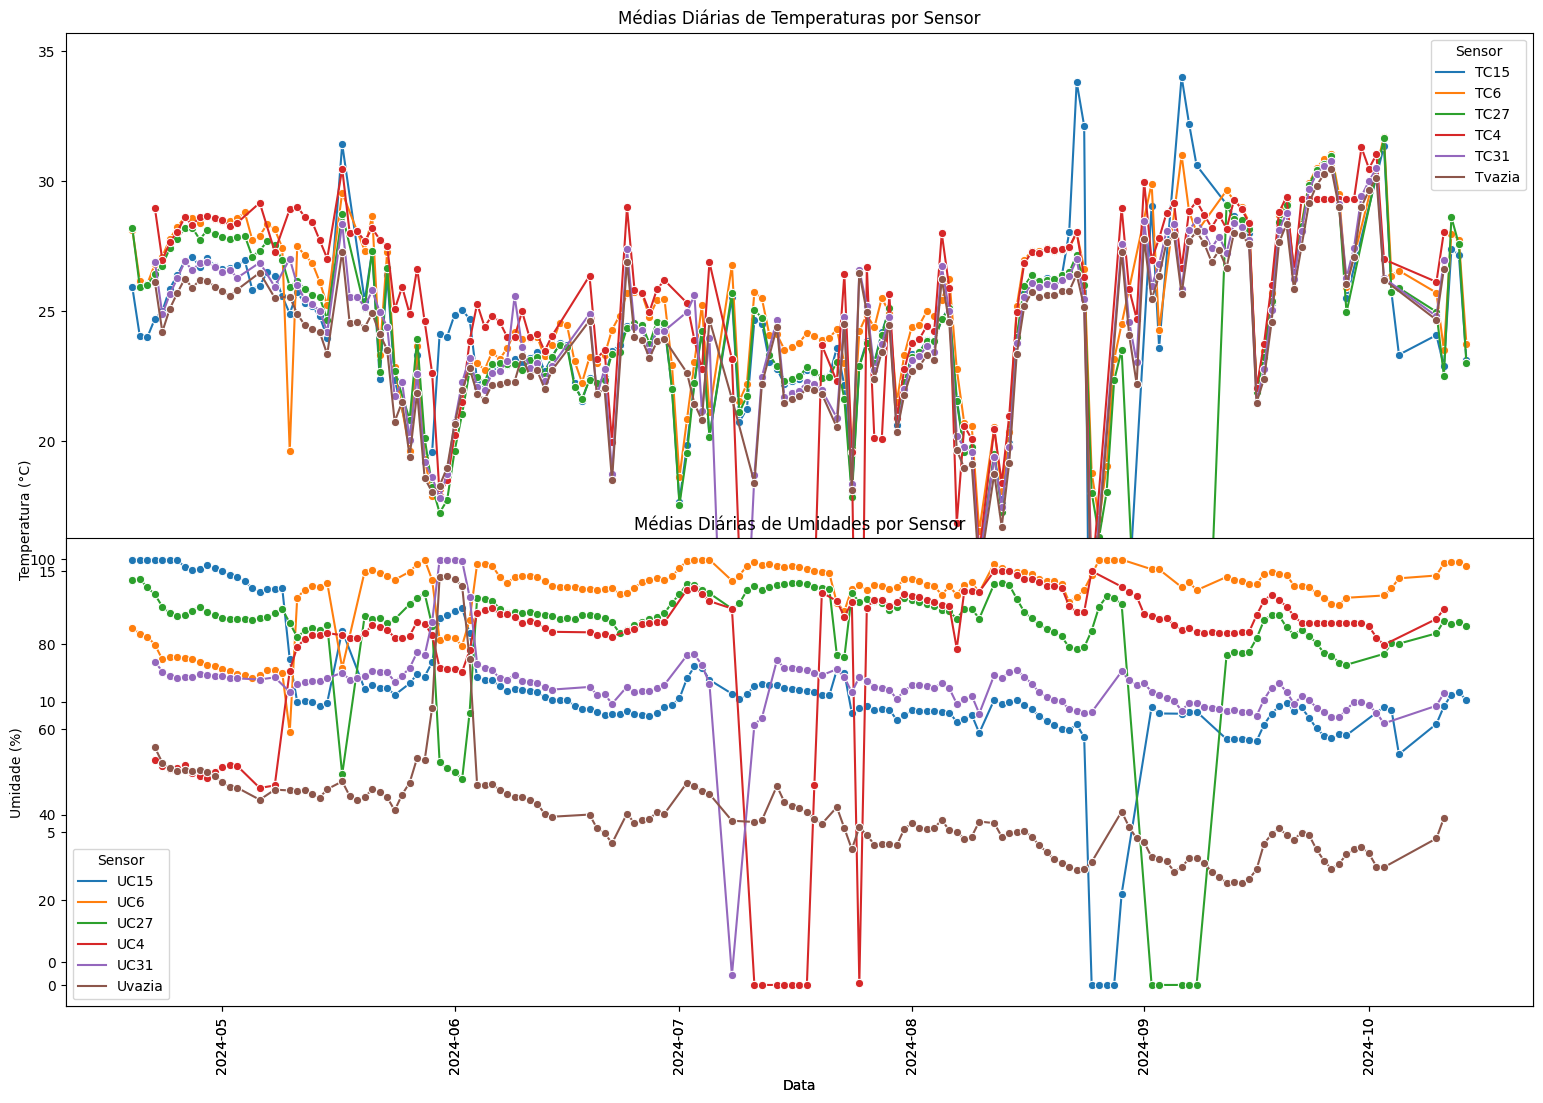

In [77]:
# Transformar as médias diárias para o formato longo
temp_means_long = daily_means.melt(id_vars=['Data'], 
                                   value_vars=['TC15', 'TC6', 'TC27', 'TC4' , 'TC31', 'Tvazia'], 
                                   var_name='Sensor', value_name='Temperatura')
umid_means_long = daily_means.melt(id_vars=['Data'], 
                                   value_vars=['UC15', 'UC6', 'UC27', 'UC4' , 'UC31', 'Uvazia'], 
                                   var_name='Sensor', value_name='Umidade')

# Configurar o tamanho do gráfico
plt.figure(figsize=(16, 12))


sns.lineplot(x='Data', y='Temperatura', hue='Sensor', data=temp_means_long, marker="o")
plt.xticks(rotation=90)
plt.title("Médias Diárias de Temperaturas por Sensor")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")

# Gráfico de umidades (médias diárias)
plt.subplot(2, 1, 2)
sns.lineplot(x='Data', y='Umidade', hue='Sensor', data=umid_means_long, marker="o")
plt.xticks(rotation=90)
plt.title("Médias Diárias de Umidades por Sensor")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")

# Ajustar layout
plt.tight_layout()
plt.show()
